## Background

### Amino acids
The amino acids are the building blocks for proteins, which are essential for all living beings' functioning. There are 22 types of amino acids involved in the creation of proteins. The 22 amino acids are typically abbreviated with the letters: **A, R, N, D, C, Q, E, G, H, I, L, K, M, F, P, S, T, W, Y, V, U, O**. The letter **X** is typically used to denote the existence of an unknown amino acid. The amino acids are glued together to form **amino acid sequences**. The sequences fold in specific ways, and a protein can contain more folded amino acid sequences. Please read this resource for a better understanding of the process of protein folding: https://en.wikipedia.org/wiki/Protein_folding. **An amino acid sequence can be expressed as a string of characters containing the 23 letters described above, for example, SFVSVAPGQTARITC...** In bioinformatics, computer algorithms extract meaningful information from the amino acid sequences and from their 3D structure.

### Antibodies

An antibody is a tiny protein leveraged by the immune system. The role of the antibody is to bind (glue) to a pathogen. By binding the pathogen, the antibody serves two purposes: it will prevent the pathogen from functioning correctly, thus rendering it harmless, and it also serves as a marker for other immune cells; thus, antibodies are also used to identify the pathogens so that our immune cells can take them out. **All antibodies share a characteristic Y-shaped structure**; however, the amino acid composition of the antibodies varies to accommodate the multitude of microbes and viruses. As one can note in the image below, the antibodies are made of **two heavy chains** which cross to form the Y shape of the antibody. **Two light chains** get attached to the heavy chains.  The regions of the antibody that bind to the pathogen are called **variable domains or regions**. **For each branch of the antibody there is a variable region that coresponds to the heavy chain and one that corresponds to the light chain.**

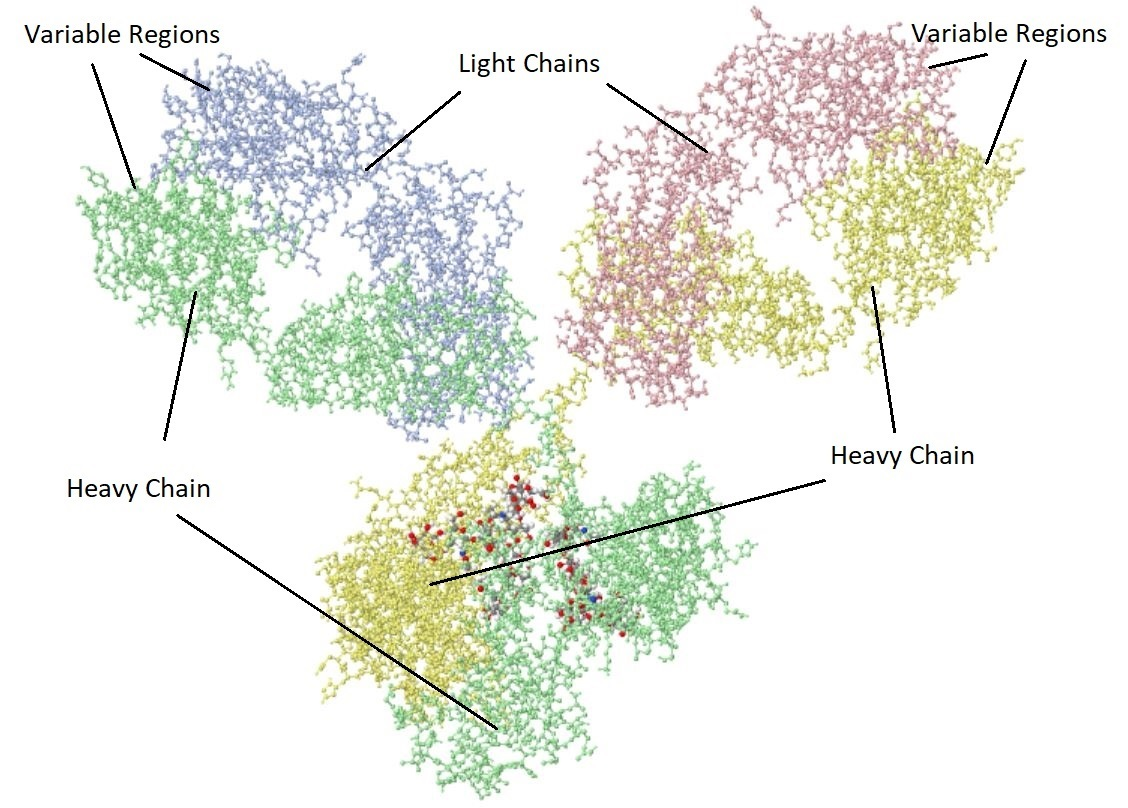

**Protein structure of IMMUNOGLOBULIN citation**

PDB ID: 1IGY 

DOI: 10.2210/pdb1IGY/pdb

Deposited: 1997-10-09 Released: 1998-04-15 

Deposition Author(s): Harris, L.J., McPherson, A.

https://www.rcsb.org/structure/1igy

**Literature citation:**

Lisa J Harris, Eileen Skaletsky, Alexander McPherson,

Crystallographic structure of an intact IgG1 monoclonal antibody

Edited by I. A. Wilson,

Journal of Molecular Biology,

Volume 275, Issue 5, 1998, Pages 861-872,

ISSN 0022-2836,

https://doi.org/10.1006/jmbi.1997.1508.
(https://www.sciencedirect.com/science/article/pii/S0022283697915084)

**RCSB PDB (rcsb.org) citation:**

H. M. Berman et al., “The Protein Data Bank,” Nucleic Acids Res., vol. 28, no. 1, pp. 235–242, 2000.

**Jmol citation:**

“Jmol: an open-source Java viewer for chemical structures in 3D.” [Online]. Available: http://www.jmol.org/.

### HIV neutralizing antibodies

Some of the HIV infected individuals develop potent antibodies able to neutralize the virus. Unfortunately, HIV mutates at a fast rate and the developed antibodies are rendered useless. Some of the potent antibodies form the subject of research for HIV vaccine or treatment.

### Virus envelope 

The **virus envelope** is the coating of the virus; it is also the part bound by the antibody.

## The Problem

The **CATNAP (Compile, Analyse and Tally NAb Panels)** dataset contains information from multiple assays (experiments) that measure the neutralization capabilities of the antibodies. Some of the assays test the potency of an antibody against a specific HIV strain. Others test the efficiency of cocktails of antibodies. Typically, the amino acid sequences that interact are provided; those are the virus envelope and the antibody light and heavy variable regions. The potency of the antibody is usually measured by **IC50 or half maximal inhibitory concentration** (https://en.wikipedia.org/wiki/IC50). This notebook leverages deep learning techniques (neural networks) to predict if an antibody can neutralize a particular virus strain.

The input of our system is :

**1)** The antibody light chain variable region amino acid sequence;

**2)** The antibody heavy chain variable region amino acid sequence;

**3)** The virus envelope sequence;

**4)** The virus PNGS (potential N-linked glycosylation sites) locations. PNGS stands for 'potential N-linked glycosylation site'. It is a specific region of the virus envelope where a carbohydrate is attached (https://en.wikipedia.org/wiki/N-linked_glycosylation). The PNGS presence or absence in specific regions of the virus envelope is crucial because it can alter the antibody binding capabilities.

The outcome is a binary variable of whether the antibody neutralizes the virus or not. **The ground truth binary outcome is determined by comparing the IC50 value of the assay (experiment) with a threshold.** The proposed model is based on **GRU neural networks**. The GRU (gated reccurent units, https://en.wikipedia.org/wiki/Gated_recurrent_unit) architecture is a bit simpler than the LSTM (long short term memory https://en.wikipedia.org/wiki/Long_short-term_memory), but it is more efficient in computation, especially memory consumption.

## Recommended preliminary study

###Recurrent neural networks

It is recommended to understand neural networks and recurrent neural networks. The article below covers both:

Understanding LSTM -- a tutorial into Long Short-Term Memory Recurrent Neural Networks

https://arxiv.org/abs/1909.09586

### Numpy

Numpy is probably the most popular Python framework for tensor(multidimensional array) manipulation. Even though we will use less Numpy and more Pytorch throughout this notebook, learning Numpy helps in understanding the overall concepts. As you learn, you will notice that many operations are similar to both frameworks, the concept is identical only the API is different. If studying machine learning, knowledge about tensor manipulation is a must. As you develop a neural network, please try to be aware of the shape and size of the tensors being processed at each step. This will make debugging much easier. 

I would recommend the official Numpy tutorials and documentation. This link navigates to a basic tutorial:
https://numpy.org/devdocs/user/quickstart.html

### Pytorch

Pytorch is the predominant framework used in this notebook. It is recommended to have some basic knowledge about it before proceeding; it has excellent documentation and several tutorials for both beginners and advanced users. It is also convenient because it provides examples for most cases of neural network types of applications.

The official documentation:
https://pytorch.org/tutorials/

The following tutorials are recommended; however, the reader is encouraged to study beyond this list. The first tutorial is an introduction to Pythorch, and the second is related to computer vision and convolutional neural networks. In the current notebook, we analyse sequences using recurrent neural networks; therefore, the Pytorch NLP tutorials are the closest to our exercise.

Introduction to Pytorch:
https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

Transfer learning and computer vision:
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

NLP (natural language processing) introductory tutorials:

NLP FROM SCRATCH: CLASSIFYING NAMES WITH A CHARACTER-LEVEL RNN
https://pytorch.org/tutorials/intermediate/char_rnn_generation_tutorial.html

NLP FROM SCRATCH: GENERATING NAMES WITH A CHARACTER-LEVEL RNN
https://pytorch.org/tutorials/intermediate/char_rnn_generation_tutorial.html

NLP FROM SCRATCH: TRANSLATION WITH A SEQUENCE TO SEQUENCE NETWORK AND ATTENTION
https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

TEXT CLASSIFICATION WITH THE TORCHTEXT LIBRARY
https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html

LANGUAGE TRANSLATION WITH TORCHTEXT
https://pytorch.org/tutorials/beginner/torchtext_translation.html

### Bioinformatics

This notebook is an example of a bioinformatics application. The material presented here relies more on computer science than biology; however, it is still recommended to have some basic knowledge of bioinformatics. Some introductory learnings are:

**Undemy course - Learn Bioinformatics in 6 Days:**

https://www.udemy.com/course/learn-bioinformatics-in-6-days/

**Other Bioinformatics courses:**

https://medium.com/computational-biology/here-are-5-bioinformatics-courses-from-top-universities-177562101c76

**Youtube:**

Ahmet Sacan Bioinformatics Playlist:

https://www.youtube.com/channel/UCpuEOklcju7BYPCv312gtNA

METUOpenCourseWare Intorduction to Bioinformatics Playlist:

https://www.youtube.com/channel/UC6Fkq1ovVbI-U352qv245UQ

Ameba Sisters Channel (overall biology concepts):

https://www.youtube.com/channel/UCb2GCoLSBXjmI_Qj1vk-44g

**From DNA to protein:**

https://www.nature.com/scitable/topicpage/translation-dna-to-mrna-to-protein-393/

### BioPython

BioPython is a software for bioinformatics. Its' most basic features allow handling DNA and amino acid sequences. However, its' full capabilities are much more complex.

https://biopython.org/wiki/Documentation

### Pandas

Pandas is a helpful software for data manipulation. We are using it in this notebook in the data preprocessing phase.

https://pandas.pydata.org/docs/getting_started/index.html

## Enable GPU

**Before you start using this notebook please enable the free GPU (Graphics Processing Unit) available.** Without it, the notebook will be very slow. For doing so navigate to the menu "Runtime" and select "Change runtime type". Then enable the GPU from the "Hardware accelerator" section. 

If you are not used to Jupyter notebooks or Google Colab please look into this tutorial before starting:

https://colab.research.google.com/notebooks/welcome.ipynb

## Preparation

### Download dependencies

**pip is the default Python package manager**, it gets installed together with Python. The command below installs the dependencies we need.

In [ ]:
!pip install biopython pandas sklearn matplotlib
# If running outside of Colab
# !pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

     |████████████████████████████████| 2.3 MB 12.1 MB/s 


### Imports

In [ ]:
import sys
import os
import urllib.request
import traceback
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics
import math
from scipy.stats import gmean
from Bio import SeqIO
import matplotlib.pyplot as plt
from Bio.Cluster import kmedoids
from Bio import Phylo
import torch as t
import time
import math
import collections
import random
import itertools
from IPython.display import HTML, display

### Constants

In [ ]:
# Folder to download the dataset
CATNAP_FOLDER = 'catnap_data'

# Download file containing experiments data
ASSAY_DOWNLOAD = 'https://www.hiv.lanl.gov/cgi-bin/common_code/download.cgi?/scratch/NEUTRALIZATION/assay.txt'
ASSAY_FILE = os.path.join(CATNAP_FOLDER, 'assay.text')

# Download file containing the aminoacid sequences of the heavy chain of the antibodies.
ANTIBODIES_HEAVY_DOWNLOAD = 'https://www.hiv.lanl.gov/cgi-bin/common_code/download.cgi?/scratch/NEUTRALIZATION/heavy_seqs_aa.fasta'
ANTIBODIES_HEAVY_FILE = os.path.join(CATNAP_FOLDER, 'heavy_seqs_aa.fasta' )

# Download file containing the aminoacid sequences of the light chain of the antibodies.
ANTIBODIES_LIGHT_DOWNLOAD = 'https://www.hiv.lanl.gov/cgi-bin/common_code/download.cgi?/scratch/NEUTRALIZATION/light_seqs_aa.fasta'
ANTIBODIES_LIGHT_FILE = os.path.join(CATNAP_FOLDER, 'light_seqs_aa.fasta')

# Download file containing the aminoacid sequences of the virus envelope.
VIRUS_DOWNLOAD = 'https://www.hiv.lanl.gov/cgi-bin/common_code/download.cgi?/scratch/NEUTRALIZATION/virseqs_aa.fasta'
VIRUS_FILE = os.path.join(CATNAP_FOLDER, 'virseqs_aa.fasta')

# PNGS stands for 'potential N-linked glycosylation site'. It is a specific region of the virus envelope where a carbohydrate is attached (https://en.wikipedia.org/wiki/N-linked_glycosylation).
# The PNGS presence or absence in specific regions of the virus envelope is crucial because it can alter the antibody binding capabilities.
VIRUS_WITH_PNGS_DONLOAD = 'https://www.hiv.lanl.gov/cgi-bin/common_code/download.cgi?/scratch/NEUTRALIZATION/virseqs_aa_O.fasta'
VIRUS_WITH_PNGS_FILE = os.path.join(CATNAP_FOLDER, 'virseqs_aa_O.fasta')

# Download file containing antibodies details
ANTIBODIES_DETAILS_DOWNLOAD = 'https://www.hiv.lanl.gov/cgi-bin/common_code/download.cgi?/scratch/NEUTRALIZATION/abs.txt'
ANTIBODIES_DETAILS_FILE = os.path.join(CATNAP_FOLDER, 'antibodies_details.text')

# Files to store the virus phylogenetic tree and virus sequences distance matrix
VIRUS_TREE = '/content/catnap_data/virseqs_aa.ph'
VIRUS_DISTANCE_MATRIX = '/content/catnap_data/virseqs_aa.dst'

# Clustalw is a software for performing multiple sequence alignment. 
# It has other valuable features; in our application, we use it to create a phylogenetic tree and a distance matrix between the sequences.
CLUSTALW_FOLDER = 'clustalw'
CLUSTALW_DOWNLOAD = 'http://www.clustal.org/download/current/clustalw-2.1-linux-x86_64-libcppstatic.tar.gz'
CLUSTALW_FILE_ZIP = os.path.join(CLUSTALW_FOLDER, 'clustalw-2.1-linux-x86_64-libcppstatic.tar.gz')
CLUSTALW_FILE = os.path.join(CLUSTALW_FOLDER, 'clustalw-2.1-linux-x86_64-libcppstatic')
CLUSTALW_EXE_FILE = '/content/clustalw/clustalw-2.1-linux-x86_64-libcppstatic/clustalw2'

# The size of the embeddings used as input to the recurrent neural network
EMBEDDING_SIZE = 20

# Viruses with an IC50 lower than CLASIFICATION_TRESHOLD are considered as sensitive to the antibody, while those with an IC50 are considered resistant
CLASIFICATION_TRESHOLD = 50

# Antibody sequence trimming
LIGHT_ANTIBODY_TRIM = 130
HEAVY_ANTIBODY_TRIM = 150

# The virus sequences are clustered based on their similarity, determined by the distance matrix computed with Clustalw.
# The virus clusters help in better delimiting the test and train datasets.
NB_VIRUS_CLUSTERS = 10

# The train - validation split is used during the training process. The validations' set purpose is to prevent overfitting.
TRAIN_VAL_SPLIT = 1/9
TEST_SPLIT = .1

# Explanation for KMER: https://en.wikipedia.org/wiki/K-mer
KMER_LEN = 51
KMER_STRIDE = 25

# Training parameters
BATCH_SIZE = 2000
EPOCHS = 10
LEARNING_RATE = 1e-4
GRAD_NORM_CLIP = 1e-1

# Network structure
ANTIBODIES_LIGHT_RNN_HIDDEN_SIZE = 128
ANTIBODIES_HEAVY_RNN_HIDDEN_SIZE = 128
VIRUS_RNN_HIDDEN_SIZE = 256

ANTIBODIES_LIGHT_RNN_NB_LAYERS = 2
ANTIBODIES_HEAVY_RNN_NB_LAYERS = 2
VIRUS_RNN_HIDDEN_NB_LAYERS = 2

EMBEDDING_DROPOUT = .0
ANTIBODIES_LIGHT_RNN_DROPOUT = .1
ANTIBODIES_HEAVY_RNN_DROPOUT = .1
VIRUS_RNN_DROPOUT = .1
FULLY_CONNECTED_DROPOUT = .1

### Utils

The notebook will run on the GPU if enabled or else on the CPU.

In [ ]:
device = 'cuda' if t.cuda.is_available() else 'cpu'

This function places the tensor on the CPU; it detaches it from gradient computation and then transforms it to NumPy array.

In [ ]:
def to_numpy(x):
  return x.cpu().detach().numpy()

Creates a folder with a given name if not existing already.

In [ ]:
def create_folder(path):
  if not os.path.isdir(path):
    os.mkdir(path)

Function to download a file from an URL.

In [ ]:
def download_file(url, file):
  if not os.path.isfile(file):
    urllib.request.urlretrieve(url, file)

Functions to measure execution time, the timer_start can be regarded as starting a chronometer, and the function timer can be regarded as stopping and resetting the chronometer.

In [ ]:
time_start = 0

def timer_start():
  global time_start
  time_start = time.time()

def timer(msg = 'Timing:'):
  print(msg, time.time() - time_start)
  timer_start()

The ProgressDisplay class shows a better-looking loader for time-consuming processes, such as training or evaluating a neural network.

In [ ]:
class ProgressDisplay():

  def __init__(self, steps, label):
    self.steps = steps
    self.counter = 0
    self.label = label
    self.progressbar = display(self.__html(), display_id=True)

  def __html(self):
    return HTML(f'{self.label} {self.counter * 100 / self.steps:.2f} %')

  def step(self):
    self.counter += 1
    self.progressbar.update(self.__html())

  def reset(self):
    self.counter = 0
    self.progressbar.update(HTML(''))

# To use:
# progress_display = ProgressDisplay(100, 'training')
# for ii in range(100):
#     time.sleep(0.02)
#     progress_display.step()
# progress_display.reset()

## Data loading

### Data download and cleanup

Create a folder to store CATNAP dataset.

In [ ]:
create_folder(CATNAP_FOLDER)

Download the CATNAP data. It consists of five files containing:

**1)** assays (experiments) file which documents which antibodies and virus pairs were used in each experiment;

**2)** the amino acid sequence of the antibody heavy chain;

**3)** the amino acid sequence of the antibody light chain;

**4)** the virus amino acid sequence;

**5)** the virus amino acid sequence with PNGS (potential N-linked glycosylation sites) locations marked. 

In [ ]:
download_file(ASSAY_DOWNLOAD, ASSAY_FILE)
download_file(ANTIBODIES_HEAVY_DOWNLOAD, ANTIBODIES_HEAVY_FILE)
download_file(ANTIBODIES_LIGHT_DOWNLOAD, ANTIBODIES_LIGHT_FILE)
download_file(VIRUS_DOWNLOAD, VIRUS_FILE)
download_file(VIRUS_WITH_PNGS_DONLOAD, VIRUS_WITH_PNGS_FILE)
download_file(ANTIBODIES_DETAILS_DOWNLOAD, ANTIBODIES_DETAILS_FILE)

The virus sequences are aligned, sometimes the characters # and * are inserted by alignment software. Unfortunately, we are unsure about the exact meaning of these characters, and they could be software specific. For this reason, we are treating them as unknown amino acids. The letter that belongs to unknown amino acids is X by convention; therfore we replace all occurrences of # and * by X.

In [ ]:
def removeHashes(path):
  with open(path, 'r') as file:
    content = file.read()
    content = content.replace('#', 'X')
    content = content.replace('*', 'X')

  with open(path, 'w') as file:
    file.write(content)

removeHashes(VIRUS_FILE)

### Read experiments data

At this step, the assays are iterated, and we create groups of **(virus, antibody, outcome)**. Throughout the experiments, the same virus and antibody might repeat multiple times. Storing their sequences for each experiment is very inefficient, and we risk running out of memory. For this reason, **the virus and antibody sequences will be stored in Python dictionaries and accessed by their identifiers. At the current step, the virus and the antibody are just identifiers, not the actual sequences.**

In our classification exercise, the outcome is a binary variable; however, the experiments present continuous IC50 values as outcomes. **The data might contain multiple experiments (assays) done for the same pair of virus - antibody. Also, the IC50 result of each experiment might differ, and in some cases, we might encounter censored data from both below and above. Censored data means that the actual IC50 value is unknown; however, it is known that the actual value is lower or greater than a given value; thus, the real value lies in an open interval.** Examples of censored data are >50, which signifies that the actual IC50 is greater than 50 or <3, which signifies that the actual IC50 is lower than 3. In the current notebook, we follow the next procedure for determining the binary outcomes.

**1)** All upper censored values of IC50 are set to 100. For example, if an IC50 is denoted in the experiment as ">50", we set its' value to 100.

**2)** All lower censored values of IC50 are taken as they are. For example, if an IC50 is denoted in the experiment as "<3", we set its' value to 3.

**3)** We take the geometric mean of the IC50 for each pair of virus-assay.

**4)** If the geometric mean is lower than a threshold, then the outcome is positive (the virus is sensitive, and the antibody is neutralizing the virus); else, it is negative (the virus is resistant, and the antibody is not neutralizing the virus).

The points 1) and 3) above are inspired from the CATNAP documentation (https://www.hiv.lanl.gov/components/sequence/HIV/neutralization/help.html).

In [ ]:
def read_assays():
  assay_df = pd.read_csv(ASSAY_FILE, sep = '\t')
  # Drop unnecssary columns
  assay_df = assay_df.drop(['Reference', 'Pubmed ID', 'IC80', 'ID50'], axis = 1)
  # Exclude mixed(contains a '+' character) and polyclonal antibodeis assays
  assay_df = assay_df[~assay_df['Antibody'].str.contains("[Pp]olyclonal|\+")]
  # Filter null and nan
  assay_df = assay_df[assay_df['IC50'].notnull()]
  # Set upper bounded data to 100
  assay_df.IC50[assay_df.IC50.str.startswith('>')] = '100'
  # Strip the < signs for lower bounded data
  assay_df.IC50[assay_df.IC50.str.contains('<')] = assay_df.IC50.str[1:]

  assays = []
  # The for loop iterates through assays grouped by the antibody and virus pairs 
  for (antibody, virus), df in assay_df.groupby(['Antibody', 'Virus']):
    ic50 = df.IC50.values.astype(np.float)
    # compute geometric mean
    geometric_mean = gmean(ic50) if len(ic50) > 1 else ic50[0]
    # check that we have available the virus and antibody sequences
    if (virus in virus_seq) and (virus in virus_pngs_mask) and (antibody in antibody_light_seq) and (antibody in antibody_heavy_seq):
      outcome = 1 if geometric_mean < CLASIFICATION_TRESHOLD else 0
      assays.append((antibody, virus, outcome))

  return assays

Group assays by antibody type. The antibody type is found in the file downloaded from the CATNAP database.

In [ ]:
def group_assays_by_antibody_type(assays):
  antibody_details_df = pd.read_csv(ANTIBODIES_DETAILS_FILE, sep = '\t')
  assays_by_antibody_type = collections.defaultdict(lambda: set())
  for assay in assays:
    antibody, virus, outcome = assay
    is_antibody_name = antibody_details_df['Name'] == antibody
    antibody_details = antibody_details_df[is_antibody_name]
    antibody_type = antibody_details['Type'].values[0]
    assays_by_antibody_type[antibody_type].add(assay)
  return assays_by_antibody_type

### Amino acid sequence processing

**The amino acid sequences are expressed as character strings, for example, "SFVSVAPGQTARITC", and each letter in the string is an amino acid.** There are 22 possible amino acids in a protein; thus, there are 22 characters, those are listed in the array "aminoacids" in the code below. To those 22 characters, we add the character 'X', which signifies an unknown character. **The variable amino_to_index maps the amino acid characters to indexes because neural networks do not work with characters but with numbers. The function sequence_to_indexes transforms the character amino acid sequences into tensors.**

The code below turns the amino acid sequences into tensors. The model is a recurrent neural network that gradually parses the amino acid sequences. For this reason, **the sequence is split into multiple overlapping segments that we call kmers**. Each kmer corresponds to a timestep in the processing of the recurrent neural network. The constants KMER_LEN and KMER_STRIDE determine the length of a kmer and the read offset for the next kmer. The other approach would be to feed each amino acid to the network individually. **By using kmers, we provide an advantage to the network in terms of detecting correlations between the amino acids inside the kmer.** The interactions between amino acids that belong to separate kmers will still be modelled through the mechanisms of the GRU. However, feeding individual amino acids to the network might make the learning more complex compared to the kmer approach. One can note the similarity between the kmer approach and how convolutional filters are applied in a convolutional neural network. The function sequence_to_indexes performs the kmer split and assigns each aminoacid an index. **Therefore, each amino acid sequence is transformed into a matrix containing amino acid indexes, and each row of the matrix represents a kmer.** Later, each amino acid index will be mapped to a learned representation by the network.

In [ ]:
aminoacids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'U', 'O', 'X']
amino_to_index = { aa: i for (i, aa) in enumerate(aminoacids) }
aminoacids_len = len(aminoacids)

def sequence_to_indexes(seq):
  return t.tensor([[amino_to_index[seq[i + j]] for j in range(KMER_LEN)] for i in range(0, len(seq) - KMER_LEN + 1, KMER_STRIDE)], dtype=t.long, device = device)

Similar processing happens for PNGS (potential N-linked glycosylation sites) masks; those **are binary vectors containing one if a PNGS is present at the amino acid site or zero otherwise**. The PNGS masks are also split into overlapping kmers, just like the amino acid sequences. **The PNGS masks correspond to the amino acid sequences and, taken together, provide more information to the model.**

In [ ]:
def kmers(seq, kmer_len, stride):
  return [ seq[i : i + kmer_len] for i in range(0, len(seq) - KMER_LEN + 1, stride) ]

def pngs_mask_to_kemr_tensor(pngs_mask):
  kmer_list = kmers(pngs_mask, KMER_LEN, KMER_STRIDE)
  return t.tensor(kmer_list, dtype=t.float32, device=device)  

The cell below is for testing purposes only.

In [ ]:
PREVIOUS_KMER_LEN, PREVIOUS_KMER_STRIDE = KMER_LEN, KMER_STRIDE

KMER_LEN, KMER_STRIDE = 3, 1
actual = sequence_to_indexes('RNXXVXADCCY').to('cpu')
expected = t.tensor([[1, 2, 22], [2, 22, 22], [22, 22, 19], [22, 19, 22], [19, 22, 0], [22, 0, 3], [0, 3, 4], [3, 4, 4], [4, 4, 18]])
assert t.equal(actual, expected)

KMER_LEN, KMER_STRIDE = 3, 2
actual = sequence_to_indexes('RNXXVXADCCY').to('cpu')
expected = t.tensor([[1, 2, 22], [22, 22, 19], [19, 22, 0], [0, 3, 4], [4, 4, 18]])
assert t.equal(actual, expected)

KMER_LEN, KMER_STRIDE = 5, 1
actual = sequence_to_indexes('RNXXVXADCCY').to('cpu')
expected = t.tensor([[1, 2, 22, 22, 19], [2, 22, 22, 19, 22], [22, 22, 19, 22, 0], [22, 19, 22, 0, 3], [19, 22, 0, 3, 4], [22, 0, 3, 4, 4], [0, 3, 4, 4, 18]])
assert t.equal(actual, expected)

KMER_LEN, KMER_STRIDE = 5, 2
actual = sequence_to_indexes('RNXXVXADCCY').to('cpu')
expected = t.tensor([[1, 2, 22, 22, 19], [22, 22, 19, 22, 0], [19, 22, 0, 3, 4], [0, 3, 4, 4, 18]])
assert t.equal(actual, expected)

KMER_LEN, KMER_STRIDE = PREVIOUS_KMER_LEN, PREVIOUS_KMER_STRIDE

The functions below read the sequences of antibodies and viruses from the dataset sequence files, which are stored in a format named **FASTA**. It is a popular format for storing DNA or amino acid sequence data (https://en.wikipedia.org/wiki/FASTA_format). We use the BioPython SeqIO class to read the FASTA files. The functions read_virus_fasta_sequences and read_antibody_fasta_sequences read the sequence data and leverage the previously defined function sequence_to_indexes for turning the character sequences into tensors. **The function read_virus_pngs_mask is different in that it transforms the virus character sequence into a binary mask, which is a unidimensional vector of the form [000101100...]. The vector will contain the value one if a site presents a PNGS (potential N-linked glycosylation site) and zero otherwise.** The dataset contains two kinds of virus sequence files, one that contains the amino acid characters and one that contains the amino acid characters and annotations of the PNGS (potential N-linked glycosylation sites) locations. The characters that correspond to a PNGS are marked with an 'O' in those files. The function read_virus_pngs_mask parses those files and looks for the characters 'O'.

In [ ]:
def read_virus_fasta_sequences(fasta_file_path):
    virus_seq_dict = {}
    for seq_record in SeqIO.parse(fasta_file_path, "fasta"):
        id_split = seq_record.id.split('.')
        virus_id = id_split[-2]
        seq = str(seq_record.seq)
        seq = seq.replace('-', '')
        virus_seq_dict[virus_id] = sequence_to_indexes(seq)
    return virus_seq_dict

def read_antibody_fasta_sequences(fasta_file_path, antibody_trim):
    antibody_seq_dict = {}
    for seq_record in SeqIO.parse(fasta_file_path, "fasta"):
        id_split = seq_record.id.split('_')
        antibody_id = id_split[0]
        seq = str(seq_record.seq)
        if len(seq) > antibody_trim:
          print(f'>{seq_record.id}')
          print(seq_record.seq)
          seq = seq[:antibody_trim]
        antibody_seq_dict[antibody_id] = sequence_to_indexes(seq)
    return antibody_seq_dict

def read_virus_pngs_mask(fasta_file_path):
  virus_seq_dict = {}
  
  for seq_record in SeqIO.parse(fasta_file_path, "fasta"):
    id_split = seq_record.id.split('.')
    virus_id = id_split[-2]
    seq = str(seq_record.seq).replace('-', '')
    virus_seq_dict[virus_id] = seq

  for virus, seq in virus_seq_dict.items():
    virus_seq_dict[virus] = [1. if c == 'O' else 0. for c in seq]
  return virus_seq_dict

Using the functions created above, we obtain four dictionaries for the virus sequences, virus PNGS masks, antibody light chain sequence and antibody heavy chain sequence.

In [ ]:
virus_seq = read_virus_fasta_sequences(VIRUS_FILE)
virus_pngs_mask = read_virus_pngs_mask(VIRUS_WITH_PNGS_FILE)
antibody_light_seq = read_antibody_fasta_sequences(ANTIBODIES_LIGHT_FILE, LIGHT_ANTIBODY_TRIM)
antibody_heavy_seq = read_antibody_fasta_sequences(ANTIBODIES_HEAVY_FILE, HEAVY_ANTIBODY_TRIM)

>10-1074__Chain_Light,_Crystal_Structure_Of_10-1074_Fab
SYVRPLSVALGETARISCGRQALGSRAVQWYQHRPGQAPILLIYNNQDRPSGIPERFSGTPDINFGTRATLTISGVEAGDEADYYCHMWDSRSGFSWSFGGATRLTVLGQPKAAPSVTLFPPSSEELQANKATLVCLISDFYPGAVTVAWKADSSPVKAGVETTTPSKQSNNKYAASSYLSLTPEQWKSHRSYSCQVTHEGSTVEKTVAPTECS
>10E8v4_KU951251_10E8v4_immunoglobulin_light_chain_mRNA
ASELTQDPAVSVALKQTVTITCRGDSLRSHYASWYQKKPGQAPVLLFYGKNNRPSGIPDRFSGSASGNRASLTITGAQAEDEADYYCSSRDKSGSRLSVFGGGTKLTVLSQPKAAPSVTLFPPSSEELQANKATLVCLISDFYPGAVTVAWKADSSPVKAGVETTTPSKQSNNKYAASSYLSLTPEQWKSHRSYSCQVTHEGSTVEKTVAPTECS
>17b__Chain_C,_Crystal_Structure_Of_Human_Anti-Hiv-1_Gp120-Reactive_Antibody_17b,_light_chain
DIVMTQSPATLSVSPGERATLSCRASESVSSDLAWYQQKPGQAPRLLIYGASTRATGVPARFSGSGSGAEFTLTISSLQSEDFAVYYCQQYNNWPPRYTFGQGTRLEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRG
>2909__2909_light_chain
SYVLTQPPSVSVAPGKTARITCGGNNIANKNVHWYQQKPGQAPVLVIYYDDDRPSGIPDRFSGSNSGNTATLTISRVEAGDEADYYCQVWDSNSDHVVFGGGTQLTVLGQPKAAPSVTLFPPSS

### PyTorch dataset and the collate function

**In PyTorch, there is typically a dataset that stores the information and a loader that performs transforms and batches the data. The "AssayDataset" below joins the data from the experiments (assays) with the sequence data of the antibodies and the virus. Precisely, the experiments (assays) tells us which antibody and virus were analyzed and the outcome (binary variable, true means that the antibody neutralizes the virus). Using the virus and antibody identifiers from the experiments, we also extract the relevant amino acid sequences (which are already split into kmers and transformed into tensors) for the antibodies and virus. There will be two amino acid sequences for the antibodies, one that belongs to the light chain variable region and one that belongs to the heavy chain variable region. There is only one amino acid sequence and a PNGS (potential M-linked glycosylation site) mask (a binary vector) for the virus.**  Therefore, the dataset object joins all these resources and will send the relevant data to the PyTorch loader.

Defining a PyTorch dataset requires us to extend the PyTorch class "torch.utils.data.Dataset" and overwrite the methods __getitem__ and __len__. For more details please view this interesting tutorial from the PyTorch documentation: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [ ]:
class AssayDataset(t.utils.data.Dataset):

  def __init__(self, assays):
    super().__init__()
    self.assays = assays

  def __getitem__(self, i):
    antibody, virus, ground_truth = self.assays[i]
    antibody_light_tensor = antibody_light_seq[antibody]
    antibody_heavy_tensor = antibody_heavy_seq[antibody]
    virus_tensor          = virus_seq[virus]
    pngs_mask_tensor      = pngs_mask_to_kemr_tensor(virus_pngs_mask[virus])
    return antibody_light_tensor, antibody_heavy_tensor, virus_tensor, pngs_mask_tensor, ground_truth

  def __len__(self):
    return len(self.assays)

**The PyTorch collate function is a callback that can be passed into a loader so that the transformations from the callback are applied before batching the data. The collate function is typically used for transformations that depend upon the whole batch and not for generic transformations or data augmentation, which are usually implemented as part of the dataset.** In our case, the sequences differ in length; for this reason, we pad the shorter sequences with zeros so that all sequences in a batch have the same length. If we do not pad the sequences, we cannot treat the whole batch as a single tensor because a tensor needs to have fixed sizes across all dimensions. For example, we cannot make a tensor out of [[1, 2], [1, 2, 3], [1, 2, 3, 4]], but we can make a tensor out of [[1, 2, 0, 0], [1, 2, 3, 0], [1, 2, 3, 4]]. Treating the whole batch as a tensor is essential for execution performance.

In [ ]:
def zero_padding(batch):
  ab_light     = [b[0] for b in batch]
  ab_heavy     = [b[1] for b in batch]
  virus        = [b[2] for b in batch]
  pngs_mask    = [b[3] for b in batch]
  ground_truth = [b[4] for b in batch]
  batched_ab_light = t.nn.utils.rnn.pad_sequence(ab_light, batch_first=True, padding_value=0)
  batched_ab_heavy = t.nn.utils.rnn.pad_sequence(ab_heavy, batch_first=True, padding_value=0)
  batched_virus = t.nn.utils.rnn.pad_sequence(virus, batch_first=True, padding_value=0)
  batched_pngs_mask = t.nn.utils.rnn.pad_sequence(pngs_mask, batch_first=True, padding_value=0)
  batched_ground_truth = t.tensor(ground_truth, dtype=t.float32, device=device)
  # print(batched_ab_light.shape, batched_ab_heavy.shape, batched_virus.shape, batched_ground_truth.shape)
  return batched_ab_light, batched_ab_heavy, batched_virus, batched_pngs_mask, batched_ground_truth

## Model

**The model is composed of more recurrent neural networks.** The GRU (gated recurrent unit) is a type of recurrent neural network similar to the LSTM (long short term memory) but is typically more efficient, especially for memory consumption. 

**In our problem, there are three sequences: antibody light chain, antibody heavy chain, and virus. The virus sequence is formed by staking the representations of the virus amino acids with the virus PNGS (potential N-linked glycosylation sites) across the second dimension.** The tensors dimensions are: **batch size, sequence length, kmer length**. By staking the PNGS masks tensor over the virus amino acid tensor, we obtain a tensor having the dimension sizes equal to: **batch size, sequence length, kmer length + PNGS length** (which is one, because the mask is a unidimensional binary vector).

**Each sequence is processed by a dedicated recurrent neural network (GRU)**; therefore, there are two separate networks for processing the amino acid sequences and a single one for processing the virus sequence. Typically, recurrent networks such as LSTM and GRU have a hidden state and an output. **The antibody networks are run first, and their concatenated hidden states serve as an initial hidden state for the virus-related network. This way, the virus-related network has a stronger learning signal and can correlate data from antibody and virus sequences.** The output of the virus-related network is further refined by a fully connected layer and a sigmoid activation that outputs the final binary result.

Another aspect worth mentioning is the embedding layers that turn the amino acid indexes (which range from 0 to 22) into vectors (having a fixed dimension). **Those vectors are also named embedding vectors, and what is interesting about them is that they are learned through training.** Therefore, the embedding representations are accommodated to the analyzed problem.

In [ ]:
class BioNet(t.nn.Module):

  def __init__(self):
    super().__init__()
    self.aminoacid_embedding = t.nn.Embedding(num_embeddings = aminoacids_len, embedding_dim = EMBEDDING_SIZE)
    self.light_ab_gru = t.nn.GRU(
      input_size = KMER_LEN * EMBEDDING_SIZE, 
      hidden_size = ANTIBODIES_LIGHT_RNN_HIDDEN_SIZE, 
      num_layers = ANTIBODIES_LIGHT_RNN_NB_LAYERS, 
      dropout = ANTIBODIES_LIGHT_RNN_DROPOUT,
      batch_first = True, 
      bidirectional = True
    )
    self.heavy_ab_gru = t.nn.GRU(
      input_size = KMER_LEN * EMBEDDING_SIZE, 
      hidden_size = ANTIBODIES_HEAVY_RNN_HIDDEN_SIZE, 
      num_layers = ANTIBODIES_HEAVY_RNN_NB_LAYERS, 
      dropout = ANTIBODIES_HEAVY_RNN_DROPOUT,
      batch_first = True, 
      bidirectional = True
    )
    self.virus_gru = t.nn.GRU(
      input_size = KMER_LEN * EMBEDDING_SIZE + KMER_LEN, 
      hidden_size = VIRUS_RNN_HIDDEN_SIZE, 
      num_layers = VIRUS_RNN_HIDDEN_NB_LAYERS, 
      dropout = VIRUS_RNN_DROPOUT,
      batch_first = True, 
      bidirectional = True        
    )
    self.embedding_dropout = t.nn.Dropout(EMBEDDING_DROPOUT)
    self.fc_dropout = t.nn.Dropout(FULLY_CONNECTED_DROPOUT)
    self.fully_connected = t.nn.Linear(2 *  VIRUS_RNN_HIDDEN_SIZE, 1)
    self.sigmoid = t.nn.Sigmoid()

  def ab_light_state_init(self, batch_size):
    return t.zeros(ANTIBODIES_LIGHT_RNN_NB_LAYERS * 2, batch_size, ANTIBODIES_LIGHT_RNN_HIDDEN_SIZE, device=device)

  def ab_heavy_state_init(self, batch_size):
    return t.zeros(ANTIBODIES_HEAVY_RNN_NB_LAYERS * 2, batch_size, ANTIBODIES_HEAVY_RNN_HIDDEN_SIZE, device=device)

  def virus_state_init(self, batch_size):
    return t.zeros(VIRUS_RNN_HIDDEN_NB_LAYERS * 2, batch_size, VIRUS_RNN_HIDDEN_SIZE, device=device)

  def forward(self, ab_light, ab_heavy, virus, pngs_mask):
    batch_size = len(ab_light)

    ab_light = self.aminoacid_embedding(ab_light).reshape(batch_size, -1, KMER_LEN * EMBEDDING_SIZE)
    ab_heavy = self.aminoacid_embedding(ab_heavy).reshape(batch_size, -1, KMER_LEN * EMBEDDING_SIZE)
    virus = self.aminoacid_embedding(virus).reshape(batch_size, -1, KMER_LEN * EMBEDDING_SIZE)

    ab_light = self.embedding_dropout(ab_light)
    ab_heavy = self.embedding_dropout(ab_heavy)
    virus = self.embedding_dropout(virus)

    virus_and_pngs = t.cat([virus, pngs_mask], axis = 2)

    light_ab_all_output, light_ab_hidden = self.light_ab_gru(ab_light, self.ab_light_state_init(batch_size))
    light_ab_output = light_ab_all_output[:, -1]

    heavy_ab_all_output, heavy_ab_hidden = self.heavy_ab_gru(ab_heavy, self.ab_heavy_state_init(batch_size))
    heavy_ab_output = heavy_ab_all_output[:, -1]

    ab_hidden = t.cat([light_ab_hidden, heavy_ab_hidden], axis = 2)

    virus_ab_all_output, _ = self.virus_gru(virus_and_pngs, ab_hidden)
    virus_output = virus_ab_all_output[:, -1]
    
    virus_output = self.fc_dropout(virus_output)

    return self.sigmoid(self.fully_connected(virus_output).squeeze())

In [ ]:
class BioNetEnsamble(t.nn.Module):

  def __init__(self, models):
    super().__init__()
    self.models = models

  def forward(self, ab_light, ab_heavy, virus, pngs_mask):
    outcome = self.models[0].forward(ab_light, ab_heavy, virus, pngs_mask)
    for i in range(1, len(self.models)):
      outcome = outcome + self.models[i].forward(ab_light, ab_heavy, virus, pngs_mask)
    return outcome / len(self.models)

## Training and evaluation

The metrics that we record for each evaluation are the loss, the accuracy and the Matthews correlation coefficient (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html).

In [ ]:
LOSS = 0
ACCURACY = 1
MATTHEWS_CORRELATION_COEFFICIENT = 2

In our case, we will train the network in a supervised manner. Supervised training requires the network prediction and the expected result, which is usually called "ground truth". **The error is calculated by a loss function which receives as parameters the tensors representing the ground truth and the network prediction.** The loss function outputs a scalar value for each training sample, representing the magnitude of the error. **In order to make the network learn, we differentiate the loss value with respect to each network parameter (which is a tensor).** This implies that the whole network, including the loss function, needs to be a sequence of differentiable operations. Software implementations make our lives very easy, because they implement the differentiation in an automatic way, by building a computational graph, in which each node represents an operation and each vertex the resulting tensor. Each node (operation) has associated its specific differentiation function. By exploiting the chain rule, each operation (starting from the loss function) is differentiated with respect to its tensors, and those are differentiated recursively with respect to their parent tensors until the differentiation chain reaches the network parameters. Next, each parameter of the network is updated by the negative value of the calculated gradient (derivative of the loss with respect to a network parameter) multiplied by a small number named learning rate. Typically values for the learning rate are between 1e-3 to 1e-5. **The learning rate assures proper convergence of the algorithm and its value is crucial in the process of training.** After each update of parameters, the network makes the loss value smaller and smaller, thus training of a neural network implies minimizing the loss function with respect to the network parameters. **The update of network parameters using the gradients and the learning rate is handled by the optimizer object defined below.** The calculation of the network prediction and loss form the forward pass of the network, the calculation of gradients(derivatives of loss with respect to network parameters) forms the backward pass.

The training and evaluation of the network can be structured in more ways. In this exercise, we propose a well organized and modular approach that maximizes code reuse. We use three functions; one is used to run the model, one that is used to evaluate and one that is used to train. The function that runs the model is called once inside the evaluation function and several times in the training function (once for each epoch). Also, the evaluation function is called inside the training function, at the end of each epoch, for calculating the metrics across the entire training. The metrics enable the analysis of the model overfitting versus underfitting and can guide the model's design and hyperparameters.

In [ ]:
# This function performs a forward pass of the network and records the metrics. 
# If training is ebabled, a backword pass and network parameter updates are also performed.
def run_network(model, loader, loss_fn, optimizer = None, isTrain = False):
  # metrics will hold the loss and accuracy
  metrics = np.zeros(3)
  # we calculate a weighted average by the number of samples in each batch,
  # all batches will have the same number of elements (weight one), except
  # for the last one which will have less elements (will have subunitary weight)
  total_weight = 0

  # display progress
  progress_display = ProgressDisplay(len(loader), 'training' if isTrain else 'evaluating')
  # Iterate through the dataset using the data loader
  for i, (ab_light, ab_heavy, virus, pngs_mask, ground_truth) in enumerate(loader):
    # Network forward pass
    pred = model.forward(ab_light, ab_heavy, virus, pngs_mask)
    # Calculate loss value
    loss = loss_fn(pred, ground_truth)
    
    # Backword pass
    if isTrain:
      assert optimizer != None
      # Gradient backwords propagation 
      loss.backward()
      # Gradient clipping protects against explosive gradients
      t.nn.utils.clip_grad_norm_(model.parameters(), GRAD_NORM_CLIP, norm_type=1)
      # Network parameter updates
      optimizer.step()
      # Refresh optimizer state
      optimizer.zero_grad()
    
    pred = to_numpy(pred) > .5
    ground_truth = to_numpy(ground_truth)
    
    # The last batch have fewer elements then the rest. 
    # For this reason we weight each metric by the population size of the batch using the variable named 'weight'
    weight = len(ground_truth) / BATCH_SIZE
    metrics[LOSS] += (loss.item() * weight)
    accuracy = sk.metrics.accuracy_score(ground_truth, pred)
    metrics[ACCURACY] += (accuracy * weight)
    correlation = sk.metrics.matthews_corrcoef(ground_truth, pred)
    metrics[MATTHEWS_CORRELATION_COEFFICIENT] += (correlation * weight)
    total_weight += weight

    # print(f'Round: {i}, Loss: {loss.item()}, Accuracy: {accuracy}, Correlation: {correlation}')
    progress_display.step()

  progress_display.reset()
  metrics /= total_weight
  return metrics

**The training happens in a loop, for a certain number of iterations, also named epochs. For each epoch, we go through the whole training dataset and evaluate the model on the validation set.** We record the metrics for both the training set and the validation set. If the accuracy on the validation set is bigger then in the previous rounds we save a checkpoint of the model(we serialize the model). This way, at the end of the training, we are left with a checkpoint of the model that recorded the best accuracy on the validation set.

Please check out this PyTorch tutorial for further details about model saving and loading: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Evaluate
def eval_network(model, loader, loss_fn):
  # We enable evaluation mode on the model. 
  # This disables all dropout layers. Batch normalization layers are very important to the performance 
  # of the network and are used extensively in most networks. Most often, these layers record statistics 
  # during the training phase and use them in the evaluation phase. Consequently, we need to tell the network 
  # in what state it is (training vs evaluation). Batch normalization is an important concept for neural network
  # training and it influences the performance a lot. For more details please check the documentation:
  # https://pytorch.org/docs/master/generated/torch.nn.BatchNorm2d.html
  model.eval()
  # During testing we do not calculate any gradients, nor perform any network parameter updates
  with t.no_grad():
    test_metrics = run_network(model, loader, loss_fn, isTrain = False)
    return test_metrics

# Train
def train_network(model, loader_train, loader_val, cross_validation_round, epochs):
  loss_fn = t.nn.BCELoss()
  # The optimizer updates the parameters of the model during training
  optimizer = t.optim.RMSprop(model.parameters(), lr = LEARNING_RATE)

  # We'll store the metrics per each epoch for plotting
  metrics_train_per_epochs, metrics_test_per_epochs = [], []
  # If testing on a certain epoch yields better accuracy, then we checkpoint the model
  best = [math.inf, 0, -math.inf]

  try:  
    for epoch in range(epochs):    
      # Train
      # We enable the training mode on the model, this activates all dropout 
      # layers and makes batch normalization layers record statistics.
      model.train()
      train_metrics = run_network(model, loader_train, loss_fn, optimizer, isTrain = True)
      metrics_train_per_epochs.append(train_metrics)
    
      test_metrics = eval_network(model, loader_val, loss_fn)
      metrics_test_per_epochs.append(test_metrics)
      
      # We save a model chekpoint if we find any improvement  
      if test_metrics[MATTHEWS_CORRELATION_COEFFICIENT] > best[MATTHEWS_CORRELATION_COEFFICIENT]:
        best = test_metrics
        t.save({'model': model.state_dict()}, 'model cross validation {}.tar'.format(cross_validation_round))

      # Logging  
      print(f'Epoch {epoch + 1}, Correlation: {test_metrics[MATTHEWS_CORRELATION_COEFFICIENT]}, Accuracy: {test_metrics[ACCURACY]}')

    print('-' * 10)  
    print(f'Cross validation round {cross_validation_round + 1}, Correlation: {best[MATTHEWS_CORRELATION_COEFFICIENT]}, Accuracy: {best[ACCURACY]}')
    print('-' * 10)
    return metrics_train_per_epochs, metrics_test_per_epochs, best
  
  except KeyboardInterrupt as e:
    print('Training interrupted at epoch', epoch)

## Plotting

This function is used to plot the metrics progression through training. It will display two curves, one for training and one for validation.

In [ ]:
def plot_train_test(train, test, title, y_title):
    plt.plot(range(len(train)), train, label = 'Train')
    plt.plot(range(len(test)), test, label = 'Test')
    plt.xlabel('Epochs')
    plt.ylabel(y_title)
    plt.title(title)
    plt.legend()
    # plt.savefig(title + '.png', dpi = 300, format = 'png')
    plt.show()

This function plots the loss, accuracy and Matthews correlation coefficient across the training epochs.

In [ ]:
def plot_epochs(train_metrics_list, test_metrics_list):
  test_correlation = list(map(lambda m: m[MATTHEWS_CORRELATION_COEFFICIENT], test_metrics_list))
  test_accuracy = list(map(lambda m: m[ACCURACY], test_metrics_list))
  test_loss = list(map(lambda m: m[LOSS], test_metrics_list))

  train_corellation = list(map(lambda m: m[MATTHEWS_CORRELATION_COEFFICIENT], train_metrics_list))
  train_accuracy = list(map(lambda m: m[ACCURACY], train_metrics_list))
  train_loss = list(map(lambda m: m[LOSS], train_metrics_list))

  plot_train_test(train_corellation, test_correlation, 'Correlation', 'Correlation')
  plot_train_test(train_accuracy, test_accuracy, 'Accuracy', 'Accuracy')
  plot_train_test(train_loss, test_loss, 'Loss', 'Loss')

## Cross-validation

### Train - validation - test dataset split

While training machine learning algorithms, and predominantly neuronal networks, which are very prone to overfitting, the dataset must be split in a certain way for training and evaluating the model. **The best way is to split it into three parts, a set for training, a set for validation and a set for testing.** If the dataset is small, sometimes the validation set might be left out, but there should be three partitions of the dataset as a best practice.  Each partition must have a single role. One partition will be used for performing the actual training and is typically the largest one. Another partition is used for model selection; this partition typically named the validation set. It is smaller and is used for evaluating the model performance during training and for choosing the model with the best performance. The validation set ensures that the model is not overfitting. The third data partition is for model evaluation. The model trained on the training set and evaluated on the validation set is evaluated once more on the test set. Sometimes the validation set and the test set are combined, especially for smaller datasets; however, splitting the two sets result in a more realistic measurement. **It is never acceptable to not split the dataset and perform the training and evaluation on the same set;** this will likely result in an overfit model, which gives a false sense that it is performing well. The only possible exception to these rules will be if the model is a simplistic one, such as linear regression, or if the dataset is very homogenous; however, splitting the dataset is much safer even in these circumstances.

### Cross-validation with clustering

Cross-validation is a process for training and evaluating the model more objectively. It has more flavours (https://en.wikipedia.org/wiki/Cross-validation_(statistics)); however, in all cases, **it implies partitioning the dataset and using a part of the data to train the model and the remaining data to evaluate the model. This process is repeated for different dataset partitions, and the results are averaged.** The leave N out cross-validation selects N elements for the test set and leaves the remaining for training. The leave one out cross-validation trains on all data except for one element, which is left for testing; this is suitable only for small datasets. Random cross-validation performs a predefined number of iterations in which it randomly selects N% of the data for testing and leaves the rest for testing.

**Most cross-validation types are designed for a training-test split. Nevertheless, those can easily be adapted to a training-validation-test split.** In these cases, there are also more possible ways for performing the data partitioning. We can leverage the cross-validation for the training versus validation split and evaluate only once at the end on the test set, and this is the approach we used in this notebook. Alternatively, we can use cross-validation to hold out the test set and use the training and validation set jointly (train on the training set and use the validation set only for early stopping and model selection). There is also the less practical alternative to explore all combinations of train, validation and test partitions; however, this would take a lot of time.

In this exercise, **we combine cross-validation with clustering**. In most cross-validation settings, the partition of the dataset happens based on the number of samples in those partitions; for example, we can choose to keep 10% of the samples for testing, 10% for validation and 80% for training. **This approach can be improved further by taking into account not only the proportions of the partitions but also the similarity between the samples.** For example, if the samples in the test set are very similar to those in the training set, the model is likely to have a high performance and vice-versa. To make sense of the similarity, we are combining cross-validation with clustering. 

We take into account the types of antibodies and the virus sequence similarity. The antibody types are essential, and if the training data does not contain samples related to a particular antibody type, the algorithm might not learn properly, such a problem being very difficult. On the other hand, we would like the viruses to be as different as possible between the different dataset partitions to ensure our model can generalize to unseen data. **Therefore, by checking the antibody types and the virus sequences similarities, we try to distribute the assays across the dataset partitions such that each partition contains data specific to all antibody types but is different in terms of virus sequences from the other partitions.**

We follow the next procedure:

**1)** Create a **phylogenetic tree and a distance matrix** between the virus sequences for estimating their evolutionary similarity;

**2)** Use the distance matrix to create K clusters using the **kmedoids** algorithm for the virus sequences;

**3)** We group all assays by their antibody type and virus cluster.

**4)** Using the assays grouped by antibody type and virus cluster, we create the testing set by sampling assays from all antibody type and virus cluster combinations. This ensures diversity and generality in the testing data.

**5)** We exclude the testing samples from the pool of data so that they are not taken into account in the following steps when we establish the data partitions for cross-validation (the training and validation steps).

**6)** We iterate through the assays grouped by antibody type and virus cluster, and for each group of assays having the same antibody type, we distribute the assays into N data partitions according to the virus clusters. The N data partitions will be used for cross-validation.

**7)** Train and cross-validate by using the data partitions created at point **6)**.

**8)** During training, serialize the model that was performing best on the validation set.

**9)** Point **8)** will be repeated for each cross-validation iteration, and we end up with more models, one for each cross-validation iteration.

**10)** Create an ensemble from the models from point **9)**. An ensemble is a combination of more models. The input is run against each model from the ensemble, and the final decision is taken by averaging the results of all models.

**11)** Test the ensemble created at point **10)** on the testing set.

### Create phylogenetic tree and distance matrix

Download CLUSTALW software

In [ ]:
create_folder(CLUSTALW_FOLDER)
download_file(CLUSTALW_DOWNLOAD, CLUSTALW_FILE_ZIP)

**A phylogenetic tree organizes the sequences according to their genetic evolution.** In practice, the natural evolution of organisms cannot be precisely known; however, different algorithms have been developed to estimate it based on the sequences. In our exercise, we use the **Clustalw** software to create a phylogenetic tree for the virus sequences. Together with the phylogenetic tree, Clustalw outputs to a file a distance matrix between the sequences. **We will use the distance matrix to better partition the dataset into training, validation and test sets for cross-validation. This ensures that very similar sequences are not found in both testing and training sets and that the features learned generalize well.**

In [ ]:
if not os.path.isfile(VIRUS_TREE):
  !tar -xzvf $CLUSTALW_FILE_ZIP -C $CLUSTALW_FOLDER
  !chmod +x $CLUSTALW_EXE_FILE
  !$CLUSTALW_EXE_FILE -INFILE=$VIRUS_FILE -TREE -OUTPUTTREE=dist

clustalw-2.1-linux-x86_64-libcppstatic/
clustalw-2.1-linux-x86_64-libcppstatic/clustalw_help
clustalw-2.1-linux-x86_64-libcppstatic/clustalw2



 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: 01_AE.CH.x.ZENV32_0111_5.KU600816              1019 aa
Sequence 2: 01_AE.CH.x.ZENV92_1008_8.KU600817              1019 aa
Sequence 3: 01_AE.CN.1999.AE01.EU363849                    1019 aa
Sequence 4: 01_AE.CN.2005.AE03.EU363851                    1019 aa
Sequence 5: 01_AE.CN.2006.AE02.EU363850                    1019 aa
Sequence 6: 01_AE.CN.2006.CNE3.HM215410                    1019 aa
Sequence 7: 01_AE.CN.2006.CNE5.HM215415                    1019 aa
Sequence 8: 01_AE.CN.2006.CNE59.HM215422                   1019 aa
Sequence 9: 01_AE.CN.2006.CNE59_N651K.HM215422             1019 aa
Sequence 10: 01_AE.CN.2006.CNE8.HM215427                    1019 aa
Sequence 11: 01_AE.CN.2006.YN192_31.GU475046                1019 aa
Sequence 12: 01_AE.CN.2007.BJOX005000_09_2.HM

Display phylogenetic tree

In [ ]:
def print_phylogenetic_tree():
  tree = Phylo.read(VIRUS_TREE, "newick")
  tree.ladderize()
  Phylo.draw_ascii(tree)

print_phylogenetic_tree()

  _____ C.TZ.2003.0077_V1_C16.HM215254
 |
 |     , C.TZ.2003.3301_V1_C24.HM215294
 |_____|
 |     | C.TZ.2004.3301_V2_C6.HM215295
 |
 |    , C.KE.1995.QB099_391M_B1.FJ866131
 |____|
 |    | C.KE.1995.QB099_391M_C8.FJ866132
 |
 |____ C.TZ.2001.304_F2_1_11.HM215286
 |
 |______ C.TZ.2001.TZA125_17.JQ362423
 |
 |____ C.MW.1993.MW965_26.U08455
 |
 |______ C.ZA.2010.CAP378_2_00_D2_5.KF114888
 |
 |_____ C.TZ.2001.556_F2_3_25.HM215317
 |
 |   __ C.MW.2008.5807_BM_D1.HQ596177
 |__|
 |  |_ C.MW.2008.5807_BM_E7.HQ596182
 |
 |_____ C.ZA.2006.CAP69_1_12_TA7_1.JX131327
 |
 |    _ C.ZA.1998.TV1_21.HM215437
 |___|
 |   |_ C.ZA.1998.TV1_29.EU855132
 |
 |_____ C.MW.2004.1394_C9G1.FJ444527
 |
 |  ___ C.MW.2008.4707_BM_F8.HM070818
 |_|
 | |___ C.MW.2008.4707_BM_H2.HM070822
 |
 | ____ C.TZ.2004.0921_V2_C14.HM215262
 ,|
 ||____ C.TZ.2004.3728_V2_C6.HM215307
 |
 |______ C.ZA.2008.CAP308_2_00_E11_35.KC154020
 |
 |_____ C.ZA.2008.CAP330_2_00_F2_41.KC154025
 |
 |____ C.ZA.2005.CAP256_SU.KF241776
 |
 |______ C.Z

### Clustering of virus sequences

Read from the file the distance matrix computed during the phylogenetic tree creation.

In [ ]:
def read_virus_distance_matrix():
  distance_matrix = []
  index_to_virus_id = {}
  count = 0
  skip_first_line = True
  with open(VIRUS_DISTANCE_MATRIX) as file:
    for line in file:
      if skip_first_line:
        skip_first_line = False
        continue
      line_split = line.split()
      # if True => the start of a new sequence in the distance matrix
      if not line.startswith(' '):
        virus_id = line_split[0].split('.')[-2]
        assert virus_id in virus_seq
        index_to_virus_id[count] = virus_id
        distance_matrix.append([float(s) for s in line_split[1:]])
        count += 1
      else:
        distance_matrix[-1] += [float(s) for s in line_split]
    assert count == len(virus_seq)
  return np.array(distance_matrix), index_to_virus_id

**Create clusters for viruses for better partitioning the cross-validation splits. The kmedoids algorithm is used, provided by the BioPython framework.** We choose the kmedoids algorithm because it allows us to create clusters starting from a distance matrix.

In [ ]:
def create_virus_to_cluster_mapping():
  distance_matrix, index_to_virus_id = read_virus_distance_matrix()
  # Create k-medoids clustering from distance matrix
  clusterid, error, nfound = kmedoids(distance_matrix, nclusters = NB_VIRUS_CLUSTERS, npass = 1000)
  medoids, counts = np.unique(clusterid, return_counts=True)
  print(f'Cluster medoids: {medoids}, cluster sizes: {counts}')
  virus_to_cluster = dict()
  cluster_to_virus = collections.defaultdict(lambda: set())
  for i, cluster in enumerate(clusterid):
    virus = index_to_virus_id[i]
    virus_to_cluster[virus] = cluster
    cluster_to_virus[cluster].add(virus)
  return virus_to_cluster, cluster_to_virus, set(medoids)

### Cross-validation

Create mappings between virus and virus-clusters. virus_to_cluster is a dictionary containing viruses as keys and the cluster ids as values, while cluster_to_virus has cluster ids as keys and viruses as values. The clusters is a collection showing all cluster ids.

In [ ]:
virus_to_cluster, cluster_to_virus, clusters = create_virus_to_cluster_mapping()

Cluster medoids: [ 34 107 123 199 387 580 656 713 819 888], cluster sizes: [ 72  48  26 136 258  90   7  76 173  70]


In [ ]:
def group_assays_by_visrus_clusters(assays):
  assays_by_virus = collections.defaultdict(lambda: set())
  for assay in assays:
    antibdy, virus, outcome = assay
    virus_cluster = virus_to_cluster[virus]
    assays_by_virus[virus_cluster].add(assay)
  return assays_by_virus

The function train_val_test_splits creates dataset splits. The assays are grouped into N cross-validation splits (for training and validation) and a test dataset. **The test set contains assays having all types of antibodies and viruses belonging to all virus clusters to ensure diversity and generality. For each cross-validation split, we include assays having all types of antibodies, but the viruses are selected to belong to a single virus cluster so that the cross-validation splits are dissimilar in terms of virus sequences.**

In [ ]:
def train_val_test_splits():
  assays = read_assays()
  assays_by_antibody_type = group_assays_by_antibody_type(assays)
  test_set = []
  train_validation_sets = {cluster:[] for cluster in clusters}

  for antibody_type, assays_per_antibody in assays_by_antibody_type.items():
    assays_by_clusters = group_assays_by_visrus_clusters(assays_per_antibody)
    # Gather test set
    for virus_cluster, assays_per_cluster in assays_by_clusters.items():
      nb_test_sampled = math.ceil(TEST_SPLIT * len(assays_per_cluster))    
      test_sampled = set(random.sample(assays_per_cluster, nb_test_sampled))
      test_set.extend(test_sampled)
      # assays_by_clusters[virus_cluster] = assays_per_cluster - test_sampled
      assays_per_cluster = assays_per_cluster - test_sampled
      # Gather cross validation splits (for training + validation)
      train_validation_sets[virus_cluster].extend(assays_per_cluster)
    
  splits_lenghts = [len(train_validation_sets[c]) for c in train_validation_sets]
  assert len(assays) == sum(splits_lenghts) + len(test_set)
  return train_validation_sets, test_set

During training, several models are serialized. Those are the models that performed best on the validation set for each cross-validation round. **We combine all those models in an ensemble to test it against the test set.**

In [ ]:
def get_ensamble_from_cross_validation():
  models = []
  for i in range(NB_VIRUS_CLUSTERS):
    checkpoint = t.load(f'model cross validation {i}.tar')
    model = BioNet().to(device)
    model.load_state_dict(checkpoint['model'])
    model.eval()
    models.append(model)
  return BioNetEnsamble(models)

Perform training and evaluation based on the cross-validation splits.

In [ ]:
def cross_validation_training():
  cross_validation_metrics = []
  loss = t.nn.BCELoss()
  train_validation_sets, test_set = train_val_test_splits()
  train_and_val_assays = set(itertools.chain(*train_validation_sets.values()))

  # Perform cross validation
  for cross_validation_round, (cluster_id, val_assays) in enumerate(train_validation_sets.items()):
    train_assays = train_and_val_assays - set(val_assays)
    assert len(train_and_val_assays) == len(train_assays) + len(val_assays)
    loader_train = t.utils.data.DataLoader(AssayDataset(list(train_assays)), BATCH_SIZE, shuffle = True, collate_fn = zero_padding, num_workers = 0)
    loader_val = t.utils.data.DataLoader(AssayDataset(list(val_assays)), BATCH_SIZE, shuffle = False, collate_fn = zero_padding, num_workers = 0)
    model = BioNet().to(device)
    metrics_train_per_epochs, metrics_val_per_epochs, best = train_network(model, loader_train, loader_val, cross_validation_round, EPOCHS)
    plot_epochs(metrics_train_per_epochs, metrics_val_per_epochs)
    cross_validation_metrics.append(best)
    print('-' * 10)
    print(f'Validation metrics for cross validation round {cross_validation_round + 1}, Correlation: {best[MATTHEWS_CORRELATION_COEFFICIENT]}, Accuracy: {best[ACCURACY]}')
    print('-' * 10)
  
  cross_validation_metrics = np.array(cross_validation_metrics)
  print('Cross validation metrics summary')
  print('Loss Acc Corr')
  print(cross_validation_metrics)
  avg_metrics = cross_validation_metrics.mean(axis = 0)
  print('*' * 10, 'Average cross validation metrics', '*' * 10)
  print(f'Correlation: {avg_metrics[MATTHEWS_CORRELATION_COEFFICIENT]} Accuracy: {avg_metrics[ACCURACY]}')
  print('*' * 54)

  # Evaluation against the test set
  ensamble_model = get_ensamble_from_cross_validation()
  loader_test = t.utils.data.DataLoader(AssayDataset(list(test_set)), BATCH_SIZE, shuffle = False, collate_fn = zero_padding, num_workers = 0)
  test_metrics = eval_network(ensamble_model, loader_test, loss)
  print('-' * 10)
  print(f'Test metrics, Correlation: {test_metrics[MATTHEWS_CORRELATION_COEFFICIENT]}, Accuracy: {test_metrics[ACCURACY]}')
  print('-' * 10)

Train on a few epochs for testing purposes.

In [ ]:
def test_N_epoch_on_all_dataset(epochs = 1):
  assays = read_assays()
  dataset = AssayDataset(assays)
  model = BioNet().to(device)
  loader = t.utils.data.DataLoader(dataset, BATCH_SIZE, shuffle = True, collate_fn = zero_padding, num_workers = 0)
  metrics_train_per_epochs, metrics_test_per_epochs, best = train_network(model, loader, loader, 0, epochs)

Run the cross-validation training and evaluation.
The logs display the Matthews correlation coefficient and the accuracy on the validation set for each epoch. Those can also be visualized in the plots.
An ensemble is created from the cross-validated models and is evaluated on the test set.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Epoch 1, Correlation: 0.3434254215611931, Accuracy: 0.6778496362166532


Epoch 2, Correlation: 0.31922269934317266, Accuracy: 0.6685529506871464


Epoch 3, Correlation: 0.32812380245347744, Accuracy: 0.6717865804365399


Epoch 4, Correlation: 0.34542535992571677, Accuracy: 0.6818916734033953


Epoch 5, Correlation: 0.33174035325730444, Accuracy: 0.6742118027485852


Epoch 6, Correlation: 0.3413972712535217, Accuracy: 0.6802748585286984


Epoch 7, Correlation: 0.40598032444176146, Accuracy: 0.7065481002425221


Epoch 8, Correlation: 0.3844218194436236, Accuracy: 0.6996766370250606


Epoch 9, Correlation: 0.3686651534172827, Accuracy: 0.6924009700889246


Epoch 10, Correlation: 0.3773329971380977, Accuracy: 0.6960388035569927
----------
Cross validation round 1, Correlation: 0.40598032444176146, Accuracy: 0.7065481002425221
----------


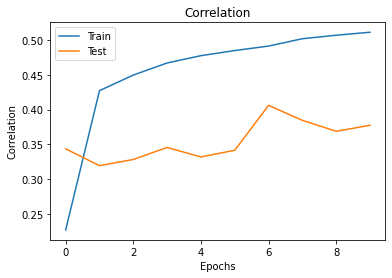

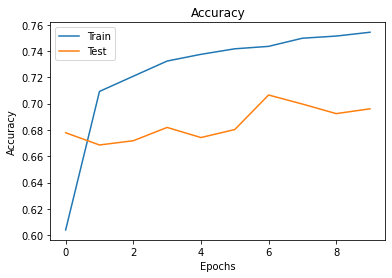

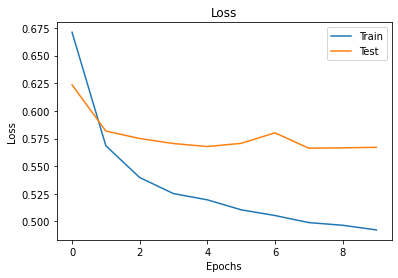

----------
Validation metrics for cross validation round 1, Correlation: 0.40598032444176146, Accuracy: 0.7065481002425221
----------


Epoch 1, Correlation: 0.315838498763416, Accuracy: 0.6918276374442792


Epoch 2, Correlation: 0.30100724224628206, Accuracy: 0.6921248142644874


Epoch 3, Correlation: 0.3203488156285716, Accuracy: 0.7046062407132242


Epoch 4, Correlation: 0.3093658073933765, Accuracy: 0.6864784546805349


Epoch 5, Correlation: 0.31364260674496675, Accuracy: 0.6912332838038633


Epoch 6, Correlation: 0.3082330438011307, Accuracy: 0.6841010401188705


Epoch 7, Correlation: 0.3030789126918561, Accuracy: 0.676225854383358


Epoch 8, Correlation: 0.3066206565453562, Accuracy: 0.6729569093610698


Epoch 9, Correlation: 0.3062992611417387, Accuracy: 0.6814264487369985


Epoch 10, Correlation: 0.30405310395770907, Accuracy: 0.6805349182763744
----------
Cross validation round 2, Correlation: 0.3203488156285716, Accuracy: 0.7046062407132242
----------


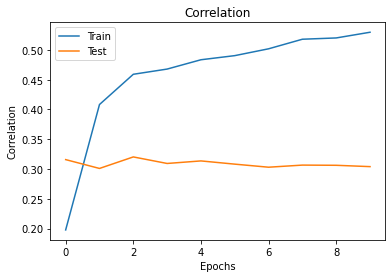

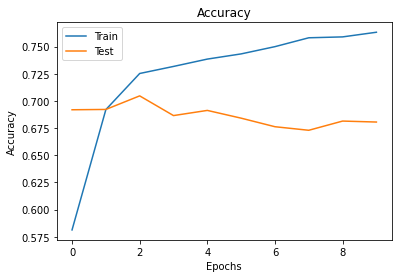

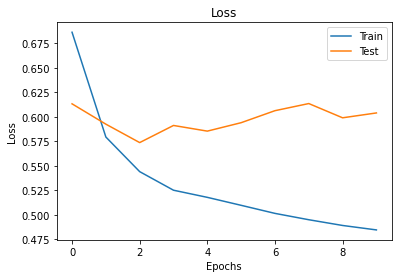

----------
Validation metrics for cross validation round 2, Correlation: 0.3203488156285716, Accuracy: 0.7046062407132242
----------


Epoch 1, Correlation: 0.37175605961082653, Accuracy: 0.7074914516630402


Epoch 2, Correlation: 0.3630180401721836, Accuracy: 0.6795150761579111


Epoch 3, Correlation: 0.4511719870106867, Accuracy: 0.7416847995026422


Epoch 4, Correlation: 0.4336785223990929, Accuracy: 0.7342244327012745


Epoch 5, Correlation: 0.42853666278092284, Accuracy: 0.728318308983525


Epoch 6, Correlation: 0.4487368689735308, Accuracy: 0.7413739508859185


Epoch 7, Correlation: 0.4376966696695075, Accuracy: 0.7351569785514455


Epoch 8, Correlation: 0.3937353622052589, Accuracy: 0.7006527820951196


Epoch 9, Correlation: 0.4384292380092328, Accuracy: 0.7370220702517873


Epoch 10, Correlation: 0.4405993395873069, Accuracy: 0.7373329188685109
----------
Cross validation round 3, Correlation: 0.4511719870106867, Accuracy: 0.7416847995026422
----------


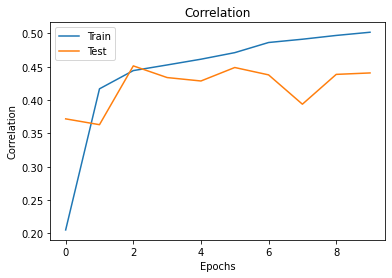

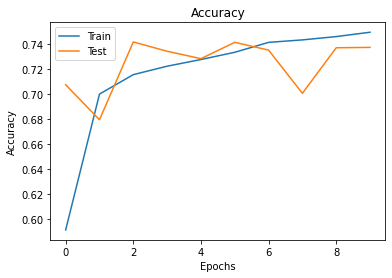

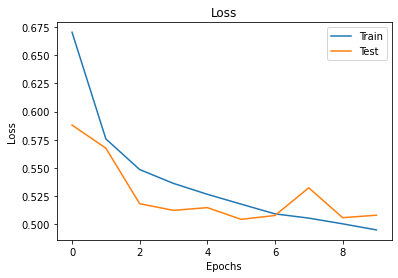

----------
Validation metrics for cross validation round 3, Correlation: 0.4511719870106867, Accuracy: 0.7416847995026422
----------


Epoch 1, Correlation: 0.2957785040491401, Accuracy: 0.6590543583145706


Epoch 2, Correlation: 0.33968824120532254, Accuracy: 0.6847861048568672


Epoch 3, Correlation: 0.35136237775642154, Accuracy: 0.6925056288195561


Epoch 4, Correlation: 0.3740073077265807, Accuracy: 0.7084271469926021


Epoch 5, Correlation: 0.36944399542718315, Accuracy: 0.7042457381794789


Epoch 6, Correlation: 0.3802136198474397, Accuracy: 0.709231264072049


Epoch 7, Correlation: 0.3797755768653632, Accuracy: 0.7093920874879381


Epoch 8, Correlation: 0.380699221850882, Accuracy: 0.7085879704084915


Epoch 9, Correlation: 0.3774695253695019, Accuracy: 0.7105178513991638


Epoch 10, Correlation: 0.36910487321694757, Accuracy: 0.7032807976841429
----------
Cross validation round 4, Correlation: 0.380699221850882, Accuracy: 0.7085879704084915
----------


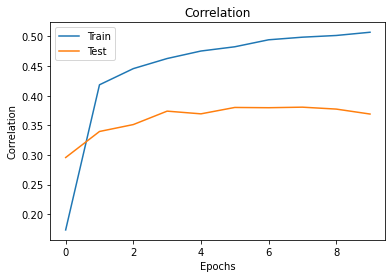

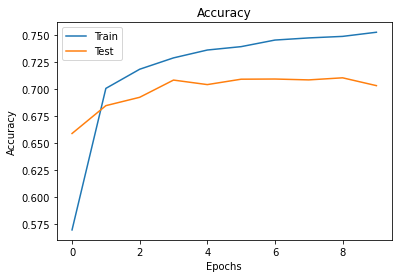

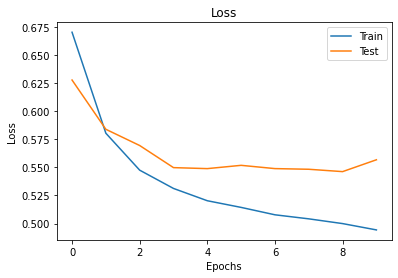

----------
Validation metrics for cross validation round 4, Correlation: 0.380699221850882, Accuracy: 0.7085879704084915
----------


Epoch 1, Correlation: 0.3355289038905479, Accuracy: 0.6867145421903051


Epoch 2, Correlation: 0.41856169794063347, Accuracy: 0.72262118491921


Epoch 3, Correlation: 0.4526622181908672, Accuracy: 0.735637342908438


Epoch 4, Correlation: 0.4049320045586763, Accuracy: 0.7176840215439856


Epoch 5, Correlation: 0.42243700654755695, Accuracy: 0.7239676840215439


Epoch 6, Correlation: 0.4418246859462285, Accuracy: 0.7208258527827647


Epoch 7, Correlation: 0.4286305942795902, Accuracy: 0.7105026929982046


Epoch 8, Correlation: 0.39581682857396233, Accuracy: 0.7131956912028724


Epoch 9, Correlation: 0.4295081801717551, Accuracy: 0.7253141831238779


Epoch 10, Correlation: 0.44253333261244693, Accuracy: 0.7280071813285457
----------
Cross validation round 5, Correlation: 0.4526622181908672, Accuracy: 0.735637342908438
----------


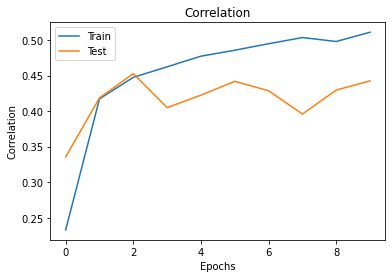

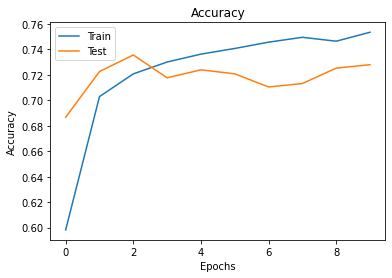

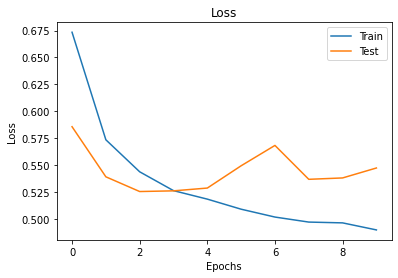

----------
Validation metrics for cross validation round 5, Correlation: 0.4526622181908672, Accuracy: 0.735637342908438
----------


Epoch 1, Correlation: 0.46781020553574326, Accuracy: 0.7297633872976339


Epoch 2, Correlation: 0.5096778001473057, Accuracy: 0.7496886674968866


Epoch 3, Correlation: 0.4703592485227094, Accuracy: 0.7272727272727273


Epoch 4, Correlation: 0.524468911256853, Accuracy: 0.7608966376089664


Epoch 5, Correlation: 0.4728536596802488, Accuracy: 0.7322540473225405


Epoch 6, Correlation: 0.5328479036677022, Accuracy: 0.7658779576587795


Epoch 7, Correlation: 0.5118779552196785, Accuracy: 0.7559153175591532


Epoch 8, Correlation: 0.507872930035684, Accuracy: 0.7534246575342467


Epoch 9, Correlation: 0.5066615206316163, Accuracy: 0.7534246575342467


Epoch 10, Correlation: 0.5274710605780336, Accuracy: 0.7621419676214197
----------
Cross validation round 6, Correlation: 0.5328479036677022, Accuracy: 0.7658779576587795
----------


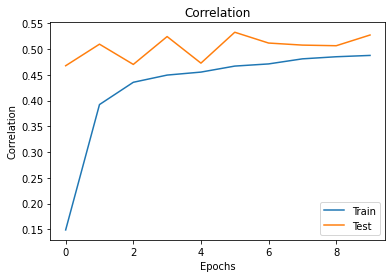

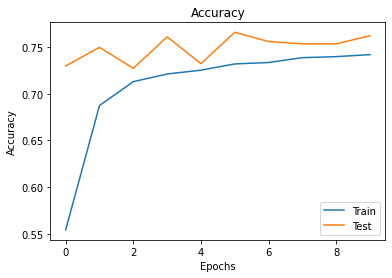

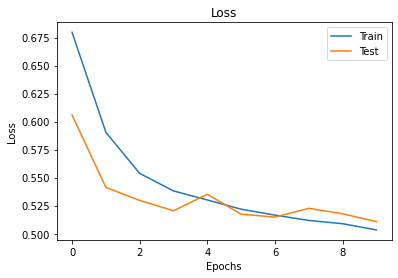

----------
Validation metrics for cross validation round 6, Correlation: 0.5328479036677022, Accuracy: 0.7658779576587795
----------


Epoch 1, Correlation: 0.33912921674035035, Accuracy: 0.6785714285714286


Epoch 2, Correlation: 0.4611409207836164, Accuracy: 0.7261904761904762


Epoch 3, Correlation: 0.3943243105295951, Accuracy: 0.7023809523809523


Epoch 4, Correlation: 0.3986680161189267, Accuracy: 0.7023809523809523


Epoch 5, Correlation: 0.3665154614655953, Accuracy: 0.6904761904761905


Epoch 6, Correlation: 0.3665154614655953, Accuracy: 0.6904761904761905


Epoch 7, Correlation: 0.3665154614655953, Accuracy: 0.6904761904761905


Epoch 8, Correlation: 0.3135799338735175, Accuracy: 0.6666666666666666


Epoch 9, Correlation: 0.3943243105295951, Accuracy: 0.7023809523809523


Epoch 10, Correlation: 0.3665154614655953, Accuracy: 0.6904761904761905
----------
Cross validation round 7, Correlation: 0.4611409207836164, Accuracy: 0.7261904761904762
----------


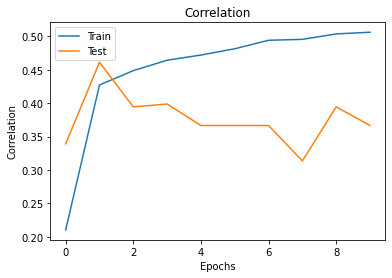

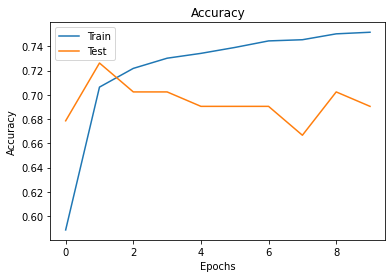

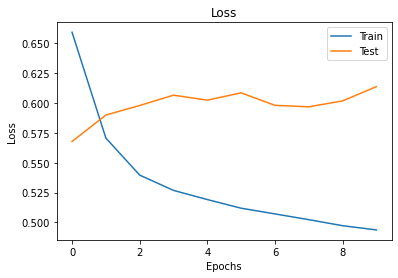

----------
Validation metrics for cross validation round 7, Correlation: 0.4611409207836164, Accuracy: 0.7261904761904762
----------


Epoch 1, Correlation: 0.36008412144705054, Accuracy: 0.6765873015873016


Epoch 2, Correlation: 0.3957026641784582, Accuracy: 0.698015873015873


Epoch 3, Correlation: 0.39261080456846503, Accuracy: 0.6970238095238095


Epoch 4, Correlation: 0.40172768170944734, Accuracy: 0.7017857142857142


Epoch 5, Correlation: 0.40258059490839554, Accuracy: 0.7095238095238096


Epoch 6, Correlation: 0.39740731216203296, Accuracy: 0.7087301587301587


Epoch 7, Correlation: 0.39788325323666734, Accuracy: 0.707936507936508


Epoch 8, Correlation: 0.3921508721195095, Accuracy: 0.7061507936507936


Epoch 9, Correlation: 0.4041129585393911, Accuracy: 0.710515873015873


Epoch 10, Correlation: 0.39695665439884814, Accuracy: 0.7061507936507937
----------
Cross validation round 8, Correlation: 0.4041129585393911, Accuracy: 0.710515873015873
----------


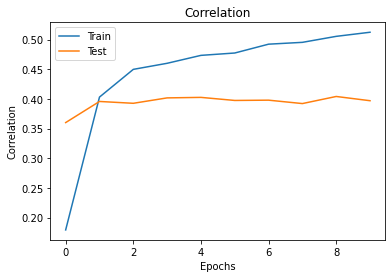

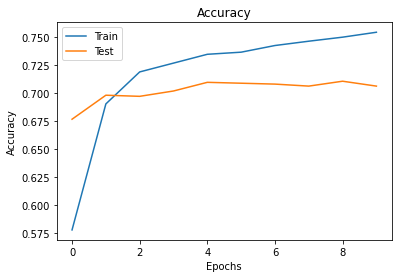

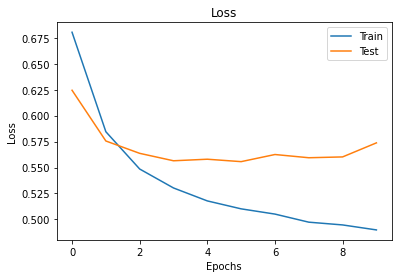

----------
Validation metrics for cross validation round 8, Correlation: 0.4041129585393911, Accuracy: 0.710515873015873
----------


Epoch 1, Correlation: 0.26474128838213634, Accuracy: 0.5715096481271282


Epoch 2, Correlation: 0.3074928545823686, Accuracy: 0.6191827468785471


Epoch 3, Correlation: 0.31197876599027424, Accuracy: 0.6282633371169126


Epoch 4, Correlation: 0.3133899980334819, Accuracy: 0.6242905788876277


Epoch 5, Correlation: 0.31780843649293944, Accuracy: 0.6328036322360954


Epoch 6, Correlation: 0.31459756490439994, Accuracy: 0.6203178206583428


Epoch 7, Correlation: 0.3146885003519513, Accuracy: 0.6242905788876277


Epoch 8, Correlation: 0.3154983526107621, Accuracy: 0.6305334846765039


Epoch 9, Correlation: 0.3055372263800325, Accuracy: 0.6174801362088537


Epoch 10, Correlation: 0.3340020151877579, Accuracy: 0.6543700340522134
----------
Cross validation round 9, Correlation: 0.3340020151877579, Accuracy: 0.6543700340522134
----------


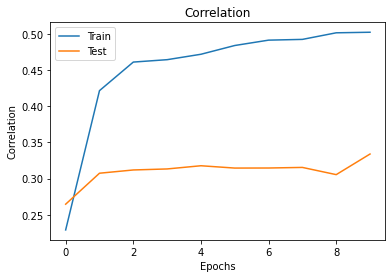

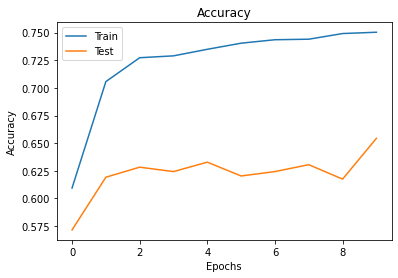

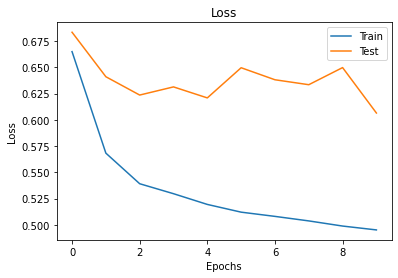

----------
Validation metrics for cross validation round 9, Correlation: 0.3340020151877579, Accuracy: 0.6543700340522134
----------


Epoch 1, Correlation: 0.25755972120688725, Accuracy: 0.518005540166205


Epoch 2, Correlation: 0.2507868556848975, Accuracy: 0.6537396121883656


Epoch 3, Correlation: 0.3343952314913598, Accuracy: 0.631578947368421


Epoch 4, Correlation: 0.29750470779173294, Accuracy: 0.6481994459833795


Epoch 5, Correlation: 0.26066814908073516, Accuracy: 0.6509695290858726


Epoch 6, Correlation: 0.29715074712755574, Accuracy: 0.6648199445983379


Epoch 7, Correlation: 0.3262618783200642, Accuracy: 0.6371191135734072


Epoch 8, Correlation: 0.23744359040822127, Accuracy: 0.6481994459833795


Epoch 9, Correlation: 0.2639988736297374, Accuracy: 0.6537396121883656


Epoch 10, Correlation: 0.28446792317041897, Accuracy: 0.5983379501385041
----------
Cross validation round 10, Correlation: 0.3343952314913598, Accuracy: 0.631578947368421
----------


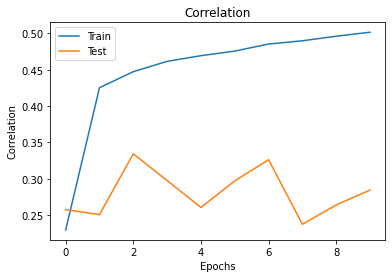

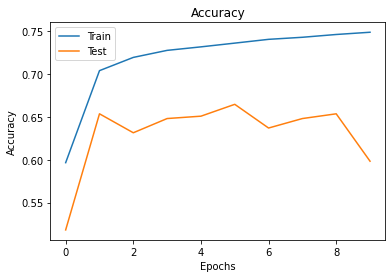

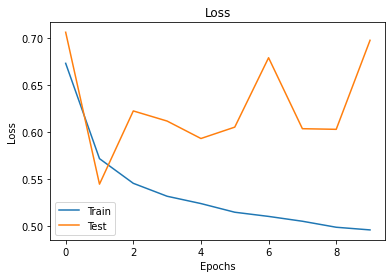

----------
Validation metrics for cross validation round 10, Correlation: 0.3343952314913598, Accuracy: 0.631578947368421
----------
Cross validation metrics summary
Loss Acc Corr
[[0.58014687 0.7065481  0.40598032]
 [0.57362643 0.70460624 0.32034882]
 [0.51817207 0.7416848  0.45117199]
 [0.54834929 0.70858797 0.38069922]
 [0.52552842 0.73563734 0.45266222]
 [0.51737148 0.76587796 0.5328479 ]
 [0.58995175 0.72619048 0.46114092]
 [0.56020316 0.71051587 0.40411296]
 [0.60649621 0.65437003 0.33400202]
 [0.62268448 0.63157895 0.33439523]]
********** Average cross validation metrics **********
Correlation: 0.40773615967925964 Accuracy: 0.7085597742061082
******************************************************


----------
Test metrics, Correlation: 0.474665966722498, Accuracy: 0.7526459026307831
----------


In [ ]:
# test_N_epoch_on_all_dataset(100)
cross_validation_training()

## Citations

This notebook uses the CATNAP (Compile, Analyze and Tally NAb Panels) dataset, BioPython and ClustalW. The notebook structure and some cells are reproduced or inspired from our previous works: "DEVELOPMENT OF AN ONLINE INSTRUCTIONAL LABORATORY FOR PROBLEM-BASED LEARNING IN BIOMEDICAL ENGINEERING" and "Data science and machine learning techniques for case-based learning in medical bioengineering education". Below are the related citations. We encourage the interested reader to explore the cited resources further.

**CATNAP** http://hiv.lanl.gov/catnap

Yoon et al. CATNAP: a tool to compile, analyze and tally neutralizing antibody panels. Nucleic Acid Res 2015 Jul 1;43(W1):W213-9. PMID 26044712.

**BioPython**

Peter J. A. Cock, Tiago Antao, Jeffrey T. Chang, Brad A. Chapman, Cymon J. Cox, Andrew Dalke, Iddo Friedberg, Thomas Hamelryck, Frank Kauff, Bartek Wilczynski, Michiel J. L. de Hoon, Biopython: freely available Python tools for computational molecular biology and bioinformatics, Bioinformatics, Volume 25, Issue 11, 1 June 2009, Pages 1422–1423, https://doi.org/10.1093/bioinformatics/btp163

**ClustalW** http://www.clustal.org/clustal2/

Larkin MA, Blackshields G, Brown NP, Chenna R, McGettigan PA, McWilliam H, Valentin F, Wallace IM, Wilm A, Lopez R, Thompson JD, Gibson TJ, Higgins DG.
(2007). Clustal W and Clustal X version 2.0. Bioinformatics, 23, 2947-2948.

**DEVELOPMENT OF AN ONLINE INSTRUCTIONAL LABORATORY FOR PROBLEM-BASED LEARNING IN BIOMEDICAL ENGINEERING**

V.R. Dănăilă, C. Buiu (2020) DEVELOPMENT OF AN ONLINE INSTRUCTIONAL LABORATORY FOR PROBLEM-BASED LEARNING IN BIOMEDICAL ENGINEERING, ICERI2020 Proceedings, pp. 2199-2206.

**Data science and machine learning techniques for case-based learning in medical bioengineering education**

V.R. Danaila, C. Buiu, "Data science and machine learning techniques for case-based learning in medical bioengineering education," in 16th International Scientific Conference "eLearning and Software for Education," 2020.

## Open questions and future steps

### Model variations

Can you come up with variations related to the current model? 

What other models would be suitable for this task?

### Other algorithms

Would other algorithms be suitable for this task?

Ideas: random forest, gradient boosted decision tree ensembles, SVM, K-nearest neighbours, logistic regression

### Hyperparameter optimisation

Implement an automatic hyperparameter selection, for example, grid search, random grid search, Bayesian optimization.

Control overfitting, experiment with different configurations of the number of layers and layer size inside the network, dropout rates, number of epochs, or other hyperparameters.

### Optimisation

Experiment with other optimisation schemes, such as Adam.